In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

sns.set_style("darkgrid")

In [2]:
!ls

README.md
analysis.ipynb
mapdata_copyright_openstreetmap_contributors.rds
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv
west_nile


In [3]:
wx = pd.read_csv("weather.csv")
spray = pd.read_csv("spray.csv")
train = pd.read_csv("train.csv")
ss = pd.read_csv("sampleSubmission.csv")

In [4]:
train['Date'] = pd.to_datetime(train['Date'])

In [5]:
spray['Date'] = pd.to_datetime(spray['Date'])
spray['am_pm'] = spray['Time'].apply(lambda x: str(x).split()[-1])
spray['Time'] = spray['Time'].apply(lambda x: str(x).split()[0])

# spray['Time'] = pd.to_datetime(spray['Time'], format = '%H:%M:%S')

In [6]:
#converting Weather columns to datetime
wx['Date'] = pd.to_datetime(wx['Date'])

In [7]:
wx.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


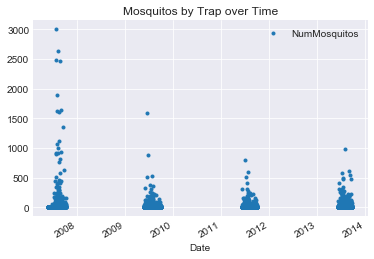

In [8]:
#plotted mosquitos by trap by date
train[['Date', 'Trap', 'NumMosquitos']].groupby(by = ['Date','Trap'])['Date','Trap','NumMosquitos'] \
    .sum().reset_index().sort_values('NumMosquitos', ascending = False).set_index('Date').plot(style = '.')
    
plt.title('Mosquitos by Trap over Time');

# Find closest Wx station

In [9]:
from haversine import haversine

In [10]:
len(train.Latitude.unique())

138

In [12]:
traps = train[['Trap', 'Latitude', 'Longitude']].drop_duplicates(['Trap']).reset_index(drop=True)

In [13]:
locations = []
for i in range(len(traps)):
    locations.append((traps['Latitude'][i], traps['Longitude'][i]))

In [14]:
ll = pd.Series(locations)
traps['Location'] = ll.values

In [18]:
traps.head()

,Trap,Latitude,Longitude,Location
0,T002,41.954690,-87.800991,"(41.95469, -87.800991)"
1,T007,41.994991,-87.769279,"(41.994991, -87.769279)"
2,T015,41.974089,-87.824812,"(41.974089, -87.824812)"
3,T045,41.921600,-87.666455,"(41.9216, -87.666455)"
4,T046,41.891118,-87.654491,"(41.891118, -87.65449100000001)"


In [19]:
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
st1 = (41.995, -87.933)

# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
st2 = (41.786, -87.752)

In [ ]:
traps['Location']

# of st1: 39
# of st2: 97


In [32]:
my_list = []
for location in locations:
    if haversine(st2, location) < haversine(st1, location):
        my_list.append(2)
    else:
        my_list.append(1)

print('# of st1:', my_list.count(1))
print('# of st2:', my_list.count(2))
        
## for some reason, even though this is very similar to above for loop, ALL of the locations get labeled with a '2'
for i in range(len(traps)):
    if haversine(st2, traps['Location'][i]) < haversine(st1, traps['Location'][i]):
        traps['station'] = 2
    else:
        traps['station'] = 1
traps.head()
    

# # traps['station'] = traps.apply(1 if haversine(st1, (traps['Latitude'], traps['Longitude'])) \
#                                < haversine(st2, (traps['Latitude'], traps['Longitude'])) else 2 for trap in traps)
    
        
    


,Trap,Latitude,Longitude,Location,station
0,T002,41.954690,-87.800991,"(41.95469, -87.800991)",2
1,T007,41.994991,-87.769279,"(41.994991, -87.769279)",2
2,T015,41.974089,-87.824812,"(41.974089, -87.824812)",2
3,T045,41.921600,-87.666455,"(41.9216, -87.666455)",2
4,T046,41.891118,-87.654491,"(41.891118, -87.65449100000001)",2
